# Perceptron : Binary Classifier

- Perceptron is inspired by the biological neuron cell of nerve system, and the idea is explored over many classification problems.

![Neuron](https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg)

The basic operation of the neuron is following:
1. Recieve the electrical signal at dendrites.
2. Signals gather in the cell body, create an electrical potential.
3. If the potential is enough to overcome the myelin sheath's potential, signal pass through.
4. Signal exit through axon terminal, and pass to the next connected neurons.

## Artificial Neuron Model

![AN](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)

- This artificial neuron mimics an operation of biological neuron. It takes multiple input signals and calculate a weighted sum. If the total sum is enough to overcome the threshold, neuron fires output signal.
- Throughout this example, the activation function will be Heaviside function.

In [5]:
# Simple Artificial Neuron Example with two input
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Simplest neuron
def neuron(x, w, threshold = 0, bias = 0):
    activation = lambda t: int(t > threshold)
    s = np.dot(x,w) + bias
    return activation(s)

In [3]:
# Define Network
w = np.array([1,-1])
model = lambda x : neuron(x, w)

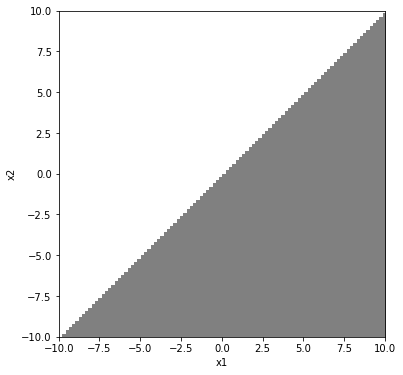

In [6]:
# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)

- Notice, this neuron acts as a simple binary classifier, whether a data satisfy the condition (x1>x2).
- It is possible to make more 'soft' classifier by changing activation function. Below is another example of using sigmoid function.

2.0


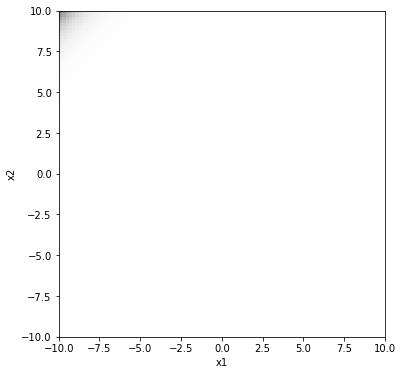

In [17]:
# Neuron with Sigmoid
import math
def neuron_sigmoid(x, w, threshold = 0, bias = 0):
    activation = lambda t: (1/1+np.exp(-t))
    s = np.dot(x,w) + bias
    return activation(s)

# Define Network
w = np.array([1,-1])
model = lambda x : neuron_sigmoid(x, w)

# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)
print(field[2][2])

## 2-Layered Artificial Neural Network

![2 Layered ANN](./images/doublelayerANN_sketch.png)



In [13]:
# Define Network
w1 = np.array([1,-1])
w2 = np.array([-1,2])
w3 = np.array([-3,1])

def double_layer_model(x):
    hidden1 = neuron(x,w1)
    hidden2 = neuron(x,w2)
    return neuron(np.array([hidden1, hidden2]), w3)

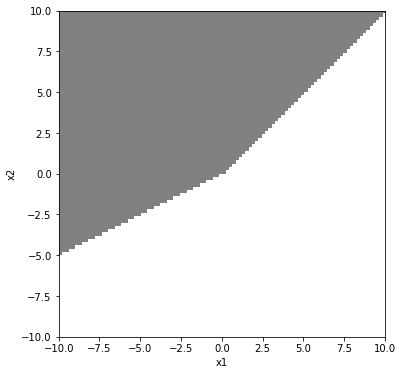

In [14]:
# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ double_layer_model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)